# Churn Rate - Artificial Neural Network approach

## Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ADS Minor/Flower/Data Challenges - talia&faith/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
len(df[df['Exited'] == 0])#stayed

7963

In [ ]:
len(df[df['Exited'] == 1 ])#exited

2037

In [ ]:
exited_df= len(df[df['Exited'] == 1 ])#exited



 As you can see above, the number of rows with stayed is three times as large as the number of rows with exited.  Thus, there is a bias in the dataset.This bias may influence the results after training. To solve this issues, i will  create a training set with 50% stayed and 50% exited.

In [ ]:
exited_df = (df[df['Exited'] == 1]).sample(2037)
len(exited_df[exited_df['Exited'] == 1])

2037

In [ ]:
stayed_df = (df[df['Exited'] == 0]).sample(2037)
len(stayed_df[stayed_df['Exited'] == 0])

2037

combined them again into one table 

In [ ]:
combined_df = pd.concat([exited_df, stayed_df], axis= 0)
combined_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7322,7323,15721507,Pagan,713,France,Female,32,1,117094.02,1,0,0,149558.83,1
6891,6892,15760865,Fan,754,Germany,Female,48,7,141819.02,1,1,0,93550.53,1
168,169,15574692,Pinto,667,Spain,Female,39,2,0.00,2,1,0,40721.24,1
3107,3108,15697424,Ku,597,Spain,Female,30,2,119370.11,1,1,1,182726.22,1
448,449,15694860,Uspensky,675,France,Female,38,6,68065.80,1,0,0,138777.00,1


In [ ]:
 randomize = combined_df.sample(frac=1).reset_index(drop=True)

In [ ]:
randomize.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,9561,15658409,Mao,686,France,Male,41,5,128876.71,3,1,1,106939.34,1
1,992,15806926,Watson,615,France,Female,35,2,97440.02,2,1,1,139816.10,0
2,5221,15753174,Thompson,571,Germany,Male,37,9,139592.98,3,1,0,104152.65,1
3,2786,15771417,Thomas,640,France,Male,43,7,132412.38,1,0,0,69584.30,1
4,8226,15804142,Tan,670,Spain,Female,57,3,175575.95,2,1,0,99061.75,1


In [ ]:
randomize.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_copy = randomize.copy(deep=True)
df_copy[['Geography', 'Gender']] = df_copy[['Geography', 'Gender']].apply(LabelEncoder().fit_transform)

In [ ]:
df_copy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,9561,15658409,Mao,686,0,1,41,5,128876.71,3,1,1,106939.34,1
1,992,15806926,Watson,615,0,0,35,2,97440.02,2,1,1,139816.10,0
2,5221,15753174,Thompson,571,1,1,37,9,139592.98,3,1,0,104152.65,1
3,2786,15771417,Thomas,640,0,1,43,7,132412.38,1,0,0,69584.30,1
4,8226,15804142,Tan,670,2,0,57,3,175575.95,2,1,0,99061.75,1


In [ ]:
import tensorflow as tf


In [ ]:
X = df_copy.iloc[:, 3:13].values
y = df_copy.iloc[:, 13].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)


In [ ]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential #used to initialize the NN
from tensorflow.keras.layers import Dense  #used to build the hidden Layers
from tensorflow.keras.layers import Dropout

def get_model():
  # Initialising the ANN
  model = Sequential()

  # Adding the input layer and the first hidden layer with dropout
  model.add(Dense(10, activation = 'swish', input_dim = 10))
  model.add(Dropout(0.1))

  # Adding the second hidden layer
  model.add(Dense(10, activation = 'swish'))
  model.add(Dropout(0.1))

  # Adding the output layer
  model.add(Dense(1))

  return model


## Training with Logits and Adam optimizer

In [ ]:
model1 = get_model()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# "Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs,
# the learning rate is reduced." 
learning_rate_reduction1 = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
# We are using categorical_crossentropy because the output are categorical so it is a good way to measure loss
# "Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order
# and second-order moments." 
# It is the classical algorithm to train neural networks with.
model1.compile(optimizer = 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_26 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_27 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train, batch_size = 10, epochs = 75 , validation_data = (X_val, y_val) , callbacks = [learning_rate_reduction1])

Epoch 1/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6650 - accuracy: 0.5625 - val_loss: 0.6146 - val_accuracy: 0.6150
Epoch 2/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6019 - accuracy: 0.6409 - val_loss: 0.5744 - val_accuracy: 0.6718
Epoch 3/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5785 - accuracy: 0.6713 - val_loss: 0.5529 - val_accuracy: 0.6856
Epoch 4/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5635 - accuracy: 0.6821 - val_loss: 0.5412 - val_accuracy: 0.6979
Epoch 5/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5563 - accuracy: 0.6995 - val_loss: 0.5295 - val_accuracy: 0.7071
Epoch 6/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5455 - accuracy: 0.6995 - val_loss: 0.5204 - val_accuracy: 0.7178
Epoch 7/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5392 - accuracy: 0.7010 - val_loss: 0.5119 - val_accuracy: 0.7239
Epoch 

In [ ]:
print("Accuracy of the model is - " , model1.evaluate(X_test,y_test)[1]*100 , "%")

26/26 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7583
Accuracy of the model is -  75.82821846008301 %


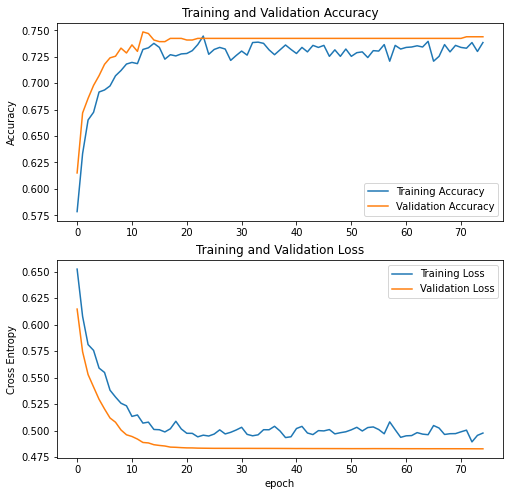

In [ ]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Training with logits and SGD optimizer

In [ ]:
model2 = get_model()


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# "Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs,
# the learning rate is reduced." 
learning_rate_reduction2 = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
# We are using categorical_crossentropy because the output are categorical so it is a good way to measure loss
# "Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order
# and second-order moments." 
# It is the classical algorithm to train neural networks with.
model2.compile(optimizer = 'sgd',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_28 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_29 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train, y_train, batch_size = 10, epochs = 75 , validation_data = (X_val, y_val) , callbacks = [learning_rate_reduction2])

Epoch 1/75
261/261 [==============================] - 1s 4ms/step - loss: 0.6727 - accuracy: 0.5696 - val_loss: 0.6489 - val_accuracy: 0.5644
Epoch 2/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6489 - accuracy: 0.5987 - val_loss: 0.6314 - val_accuracy: 0.5951
Epoch 3/75
261/261 [==============================] - 1s 2ms/step - loss: 0.6389 - accuracy: 0.5942 - val_loss: 0.6174 - val_accuracy: 0.6150
Epoch 4/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6228 - accuracy: 0.6197 - val_loss: 0.6060 - val_accuracy: 0.6334
Epoch 5/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6125 - accuracy: 0.6266 - val_loss: 0.5959 - val_accuracy: 0.6396
Epoch 6/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6165 - accuracy: 0.6179 - val_loss: 0.5912 - val_accuracy: 0.6411
Epoch 7/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5927 - accuracy: 0.6554 - val_loss: 0.5863 - val_accuracy: 0.6411
Epoch 

In [ ]:
print("Accuracy of the model is - " , model2.evaluate(X_test,y_test)[1]*100 , "%")

26/26 [==============================] - 0s 1ms/step - loss: 0.5250 - accuracy: 0.7190
Accuracy of the model is -  71.90183997154236 %


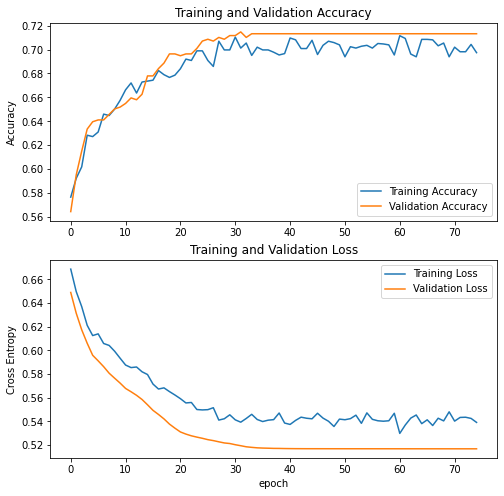

In [ ]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Training with Softmax Output Layer

In [ ]:
from sklearn.preprocessing import OneHotEncoder
 #creating instance of one-hot-encoder
enc = OneHotEncoder(categories='auto')
y_train = pd.DataFrame(enc.fit_transform(y_train.reshape(-1,1)).toarray())
y_test = pd.DataFrame(enc.fit_transform(y_test.reshape(-1,1)).toarray())
y_val = pd.DataFrame(enc.fit_transform(y_val.reshape(-1,1)).toarray())

In [ ]:

def get_model2():
  # Initialising the ANN
  model = Sequential()

  # Adding the input layer and the first hidden layer with dropout
  model.add(Dense(10, activation = 'swish', input_dim = 10))
  model.add(Dropout(0.1))

  # Adding the second hidden layer
  model.add(Dense(10, activation = 'swish'))
  model.add(Dropout(0.1))

  # Adding the output layer
  model.add(Dense(2, activation = 'softmax'))

  return model

In [ ]:
model3 = get_model2()


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# "Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs,
# the learning rate is reduced." 
learning_rate_reduction3 = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
# We are using categorical_crossentropy because the output are categorical so it is a good way to measure loss
# "Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order
# and second-order moments." 
# It is the classical algorithm to train neural networks with.
model3.compile(optimizer = 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_30 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_31 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 22        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = model3.fit(X_train, y_train, batch_size = 10, epochs = 75 , validation_data = (X_val, y_val) , callbacks = [learning_rate_reduction3])

Epoch 1/75
261/261 [==============================] - 1s 4ms/step - loss: 0.6671 - accuracy: 0.6234 - val_loss: 0.5999 - val_accuracy: 0.7086
Epoch 2/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6249 - accuracy: 0.6618 - val_loss: 0.5651 - val_accuracy: 0.7101
Epoch 3/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5795 - accuracy: 0.7034 - val_loss: 0.5515 - val_accuracy: 0.7178
Epoch 4/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5784 - accuracy: 0.6926 - val_loss: 0.5438 - val_accuracy: 0.7285
Epoch 5/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5648 - accuracy: 0.7082 - val_loss: 0.5369 - val_accuracy: 0.7316
Epoch 6/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5490 - accuracy: 0.7186 - val_loss: 0.5320 - val_accuracy: 0.7331
Epoch 7/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5451 - accuracy: 0.7243 - val_loss: 0.5270 - val_accuracy: 0.7377
Epoch 

In [ ]:
print("Accuracy of the model is - " , model3.evaluate(X_test,y_test)[1]*100 , "%")

26/26 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7448
Accuracy of the model is -  74.47852492332458 %


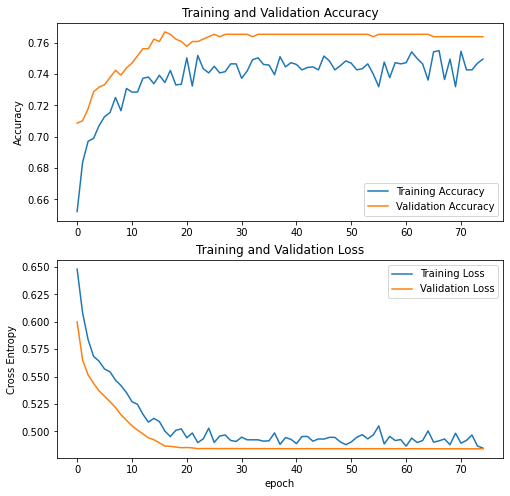

In [ ]:
import matplotlib.pyplot as plt

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Training without Gender

In [ ]:
X = df_copy.iloc[:, 3:13]
X = X.loc[:, X.columns != 'Gender'].values
y = df_copy.iloc[:, 13].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [ ]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential #used to initialize the NN
from tensorflow.keras.layers import Dense  #used to build the hidden Layers
from tensorflow.keras.layers import Dropout

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer with dropout
model.add(Dense(9, activation = 'swish', input_dim = 9))
model.add(Dropout(0.1))

# Adding the second hidden layer
model.add(Dense(9, activation = 'swish'))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(1))


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# "Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs,
# the learning rate is reduced." 
learning_rate_reduction1 = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
# We are using categorical_crossentropy because the output are categorical so it is a good way to measure loss
# "Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order
# and second-order moments." 
# It is the classical algorithm to train neural networks with.
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_8 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_9 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 10        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 75 , validation_data = (X_val, y_val) , callbacks = [learning_rate_reduction1])

Epoch 1/75
261/261 [==============================] - 3s 4ms/step - loss: 0.6854 - accuracy: 0.5083 - val_loss: 0.6531 - val_accuracy: 0.5905
Epoch 2/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6427 - accuracy: 0.5735 - val_loss: 0.6304 - val_accuracy: 0.6687
Epoch 3/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6282 - accuracy: 0.6171 - val_loss: 0.6120 - val_accuracy: 0.6702
Epoch 4/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6006 - accuracy: 0.6443 - val_loss: 0.5984 - val_accuracy: 0.6748
Epoch 5/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5830 - accuracy: 0.6710 - val_loss: 0.5880 - val_accuracy: 0.6764
Epoch 6/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5752 - accuracy: 0.6853 - val_loss: 0.5760 - val_accuracy: 0.6810
Epoch 7/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5650 - accuracy: 0.6666 - val_loss: 0.5673 - val_accuracy: 0.6810
Epoch 

In [ ]:
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

26/26 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7436
Accuracy of the model is -  74.35582876205444 %


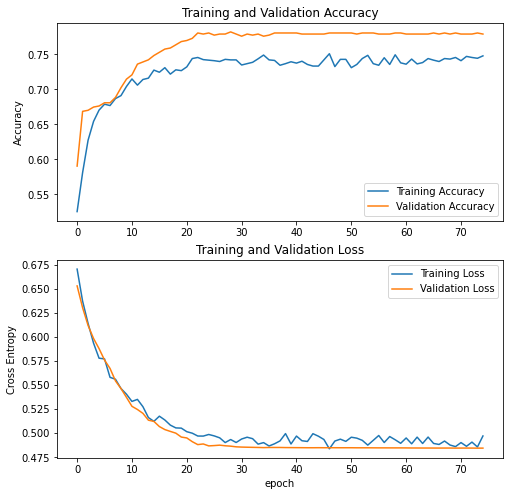

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Training without Age

In [ ]:
X = df_copy.iloc[:, 3:13]
X = X.loc[:, X.columns != 'Age'].values
y = df_copy.iloc[:, 13].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [ ]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential #used to initialize the NN
from tensorflow.keras.layers import Dense  #used to build the hidden Layers
from tensorflow.keras.layers import Dropout

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer with dropout
model.add(Dense(9, activation = 'swish', input_dim = 9))
model.add(Dropout(0.1))

# Adding the second hidden layer
model.add(Dense(9, activation = 'swish'))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(1))


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# "Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs,
# the learning rate is reduced." 
learning_rate_reduction1 = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
# We are using categorical_crossentropy because the output are categorical so it is a good way to measure loss
# "Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order
# and second-order moments." 
# It is the classical algorithm to train neural networks with.
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_10 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_11 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 10        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 75 , validation_data = (X_val, y_val) , callbacks = [learning_rate_reduction1])

Epoch 1/75
261/261 [==============================] - 1s 3ms/step - loss: 0.7461 - accuracy: 0.4754 - val_loss: 0.6862 - val_accuracy: 0.5353
Epoch 2/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6970 - accuracy: 0.5072 - val_loss: 0.6743 - val_accuracy: 0.5491
Epoch 3/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6742 - accuracy: 0.5399 - val_loss: 0.6675 - val_accuracy: 0.5706
Epoch 4/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6634 - accuracy: 0.5585 - val_loss: 0.6563 - val_accuracy: 0.5920
Epoch 5/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6479 - accuracy: 0.5754 - val_loss: 0.6385 - val_accuracy: 0.6089
Epoch 6/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6311 - accuracy: 0.6029 - val_loss: 0.6160 - val_accuracy: 0.6380
Epoch 7/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6039 - accuracy: 0.6287 - val_loss: 0.5997 - val_accuracy: 0.6626
Epoch 

In [ ]:
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

26/26 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.6969
Accuracy of the model is -  69.69324946403503 %


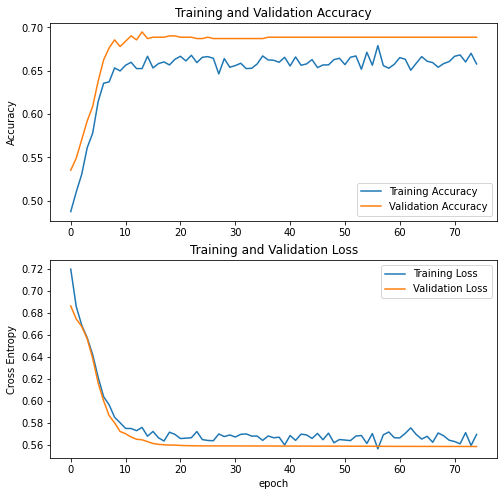

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Training without Geography

In [ ]:
X = df_copy.iloc[:, 3:13]
X = X.loc[:, X.columns != 'Geography'].values
y = df_copy.iloc[:, 13].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [ ]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential #used to initialize the NN
from tensorflow.keras.layers import Dense  #used to build the hidden Layers
from tensorflow.keras.layers import Dropout

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer with dropout
model.add(Dense(9, activation = 'swish', input_dim = 9))
model.add(Dropout(0.1))

# Adding the second hidden layer
model.add(Dense(9, activation = 'swish'))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(1))


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# "Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs,
# the learning rate is reduced." 
learning_rate_reduction1 = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
# We are using categorical_crossentropy because the output are categorical so it is a good way to measure loss
# "Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order
# and second-order moments." 
# It is the classical algorithm to train neural networks with.
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_12 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_13 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 10        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 75 , validation_data = (X_val, y_val) , callbacks = [learning_rate_reduction1])

Epoch 1/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6828 - accuracy: 0.5250 - val_loss: 0.6295 - val_accuracy: 0.6319
Epoch 2/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6064 - accuracy: 0.6266 - val_loss: 0.6099 - val_accuracy: 0.6672
Epoch 3/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6004 - accuracy: 0.6488 - val_loss: 0.5993 - val_accuracy: 0.6748
Epoch 4/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5803 - accuracy: 0.6698 - val_loss: 0.5908 - val_accuracy: 0.6871
Epoch 5/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5802 - accuracy: 0.6651 - val_loss: 0.5817 - val_accuracy: 0.6887
Epoch 6/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5802 - accuracy: 0.6866 - val_loss: 0.5721 - val_accuracy: 0.7086
Epoch 7/75
261/261 [==============================] - 1s 3ms/step - loss: 0.5501 - accuracy: 0.7033 - val_loss: 0.5626 - val_accuracy: 0.7270
Epoch 

In [ ]:
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

26/26 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7337
Accuracy of the model is -  73.3742356300354 %


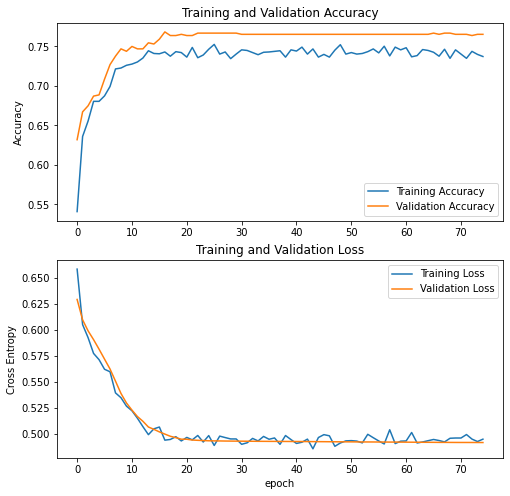

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Training without Gender, Age and Geography

In [ ]:
X = df_copy.iloc[:, 3:13]
X = X.loc[:, (X.columns != 'Gender') & (X.columns != 'Age') & (X.columns != 'Geography')].values
y = df_copy.iloc[:, 13].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [ ]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential #used to initialize the NN
from tensorflow.keras.layers import Dense  #used to build the hidden Layers
from tensorflow.keras.layers import Dropout

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer with dropout
model.add(Dense(7, activation = 'swish', input_dim = 7))
model.add(Dropout(0.1))

# Adding the second hidden layer
model.add(Dense(7, activation = 'swish'))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(1))


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# "Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs,
# the learning rate is reduced." 
learning_rate_reduction1 = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
# We are using categorical_crossentropy because the output are categorical so it is a good way to measure loss
# "Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order
# and second-order moments." 
# It is the classical algorithm to train neural networks with.
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 7)                 56        
_________________________________________________________________
dropout_18 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 7)                 56        
_________________________________________________________________
dropout_19 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 75 , validation_data = (X_val, y_val) , callbacks = [learning_rate_reduction1])

Epoch 1/75
261/261 [==============================] - 1s 3ms/step - loss: 0.7044 - accuracy: 0.5258 - val_loss: 0.6847 - val_accuracy: 0.5706
Epoch 2/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6787 - accuracy: 0.5527 - val_loss: 0.6725 - val_accuracy: 0.5798
Epoch 3/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6550 - accuracy: 0.5736 - val_loss: 0.6623 - val_accuracy: 0.5920
Epoch 4/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6475 - accuracy: 0.5842 - val_loss: 0.6518 - val_accuracy: 0.6043
Epoch 5/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6406 - accuracy: 0.5845 - val_loss: 0.6424 - val_accuracy: 0.6212
Epoch 6/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6306 - accuracy: 0.6165 - val_loss: 0.6297 - val_accuracy: 0.6350
Epoch 7/75
261/261 [==============================] - 1s 3ms/step - loss: 0.6214 - accuracy: 0.6340 - val_loss: 0.6177 - val_accuracy: 0.6472
Epoch 

In [ ]:
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

26/26 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.6933
Accuracy of the model is -  69.32515501976013 %


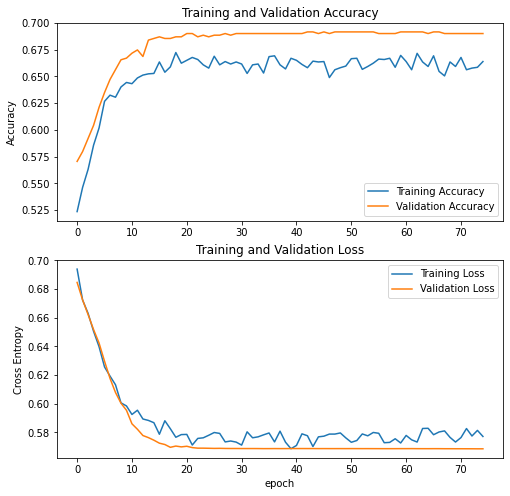

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()